In [125]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# **Getting Started** 

**Title : Lung Cancer Prediction**
  
  **Lung Cancer Status :**

  0 -- > Yes 

  1 -- > NO


### **Data Preprocessing**

**Read .csv file into pandas**

In [126]:
data  = pd.read_csv(r'C:\Users\DELL\Desktop\ML_Project\Lung-Cancer-Project-main\survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## **Exploratory data analysis**

In [127]:
#Shape of data 
print(data.shape)
#dtypes of data 
print(data.dtypes)

(309, 16)
GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [128]:
# Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [129]:
# Checking for null values
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### **Checking Duplicates**

In [130]:
data.duplicated().sum()

33

### **Dropping Duplicates**

In [131]:
data = data.drop_duplicates()

# **Transformation**

In [132]:
# label encoding
data.replace({"LUNG_CANCER":{'YES':0,'NO':1}},inplace=True)
# printing the first 5 rows of the dataframe
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [133]:
# Value_counts of Lung Cancer
data['LUNG_CANCER'].value_counts()

0    238
1     38
Name: LUNG_CANCER, dtype: int64

In [134]:
# label encoding
data.replace({"GENDER":{'M':0,'F':1}},inplace=True)
# printing the first 5 rows of the dataframe
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


# Data Visualization

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

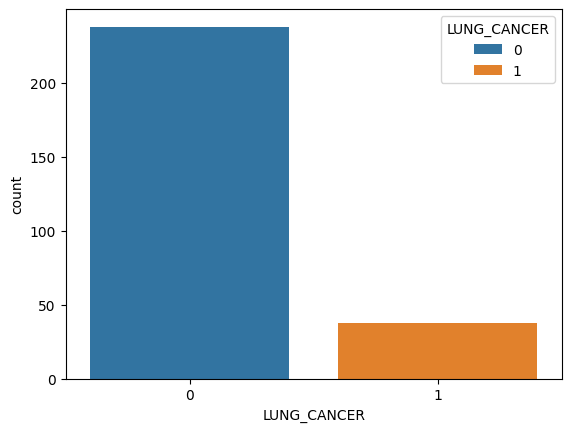

In [135]:
# Lung Cancer & Lung Cancer Count
import seaborn as sns
sns.countplot(x='LUNG_CANCER',hue='LUNG_CANCER',data=data)

<Axes: xlabel='GENDER', ylabel='count'>

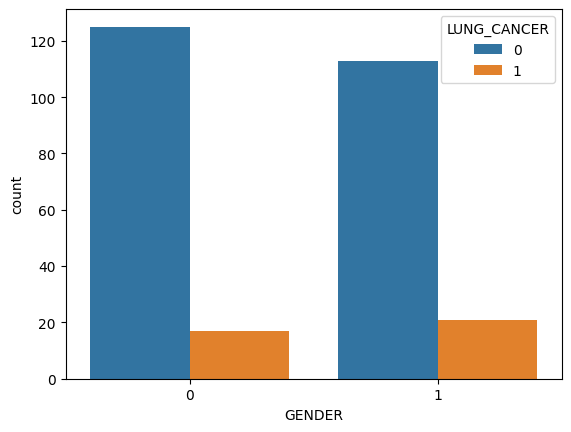

In [136]:
# Gender & Lung Cancer
import seaborn as sns
sns.countplot(x='GENDER',hue='LUNG_CANCER',data=data)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11556\2218997533.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_11556\2218997533.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_1

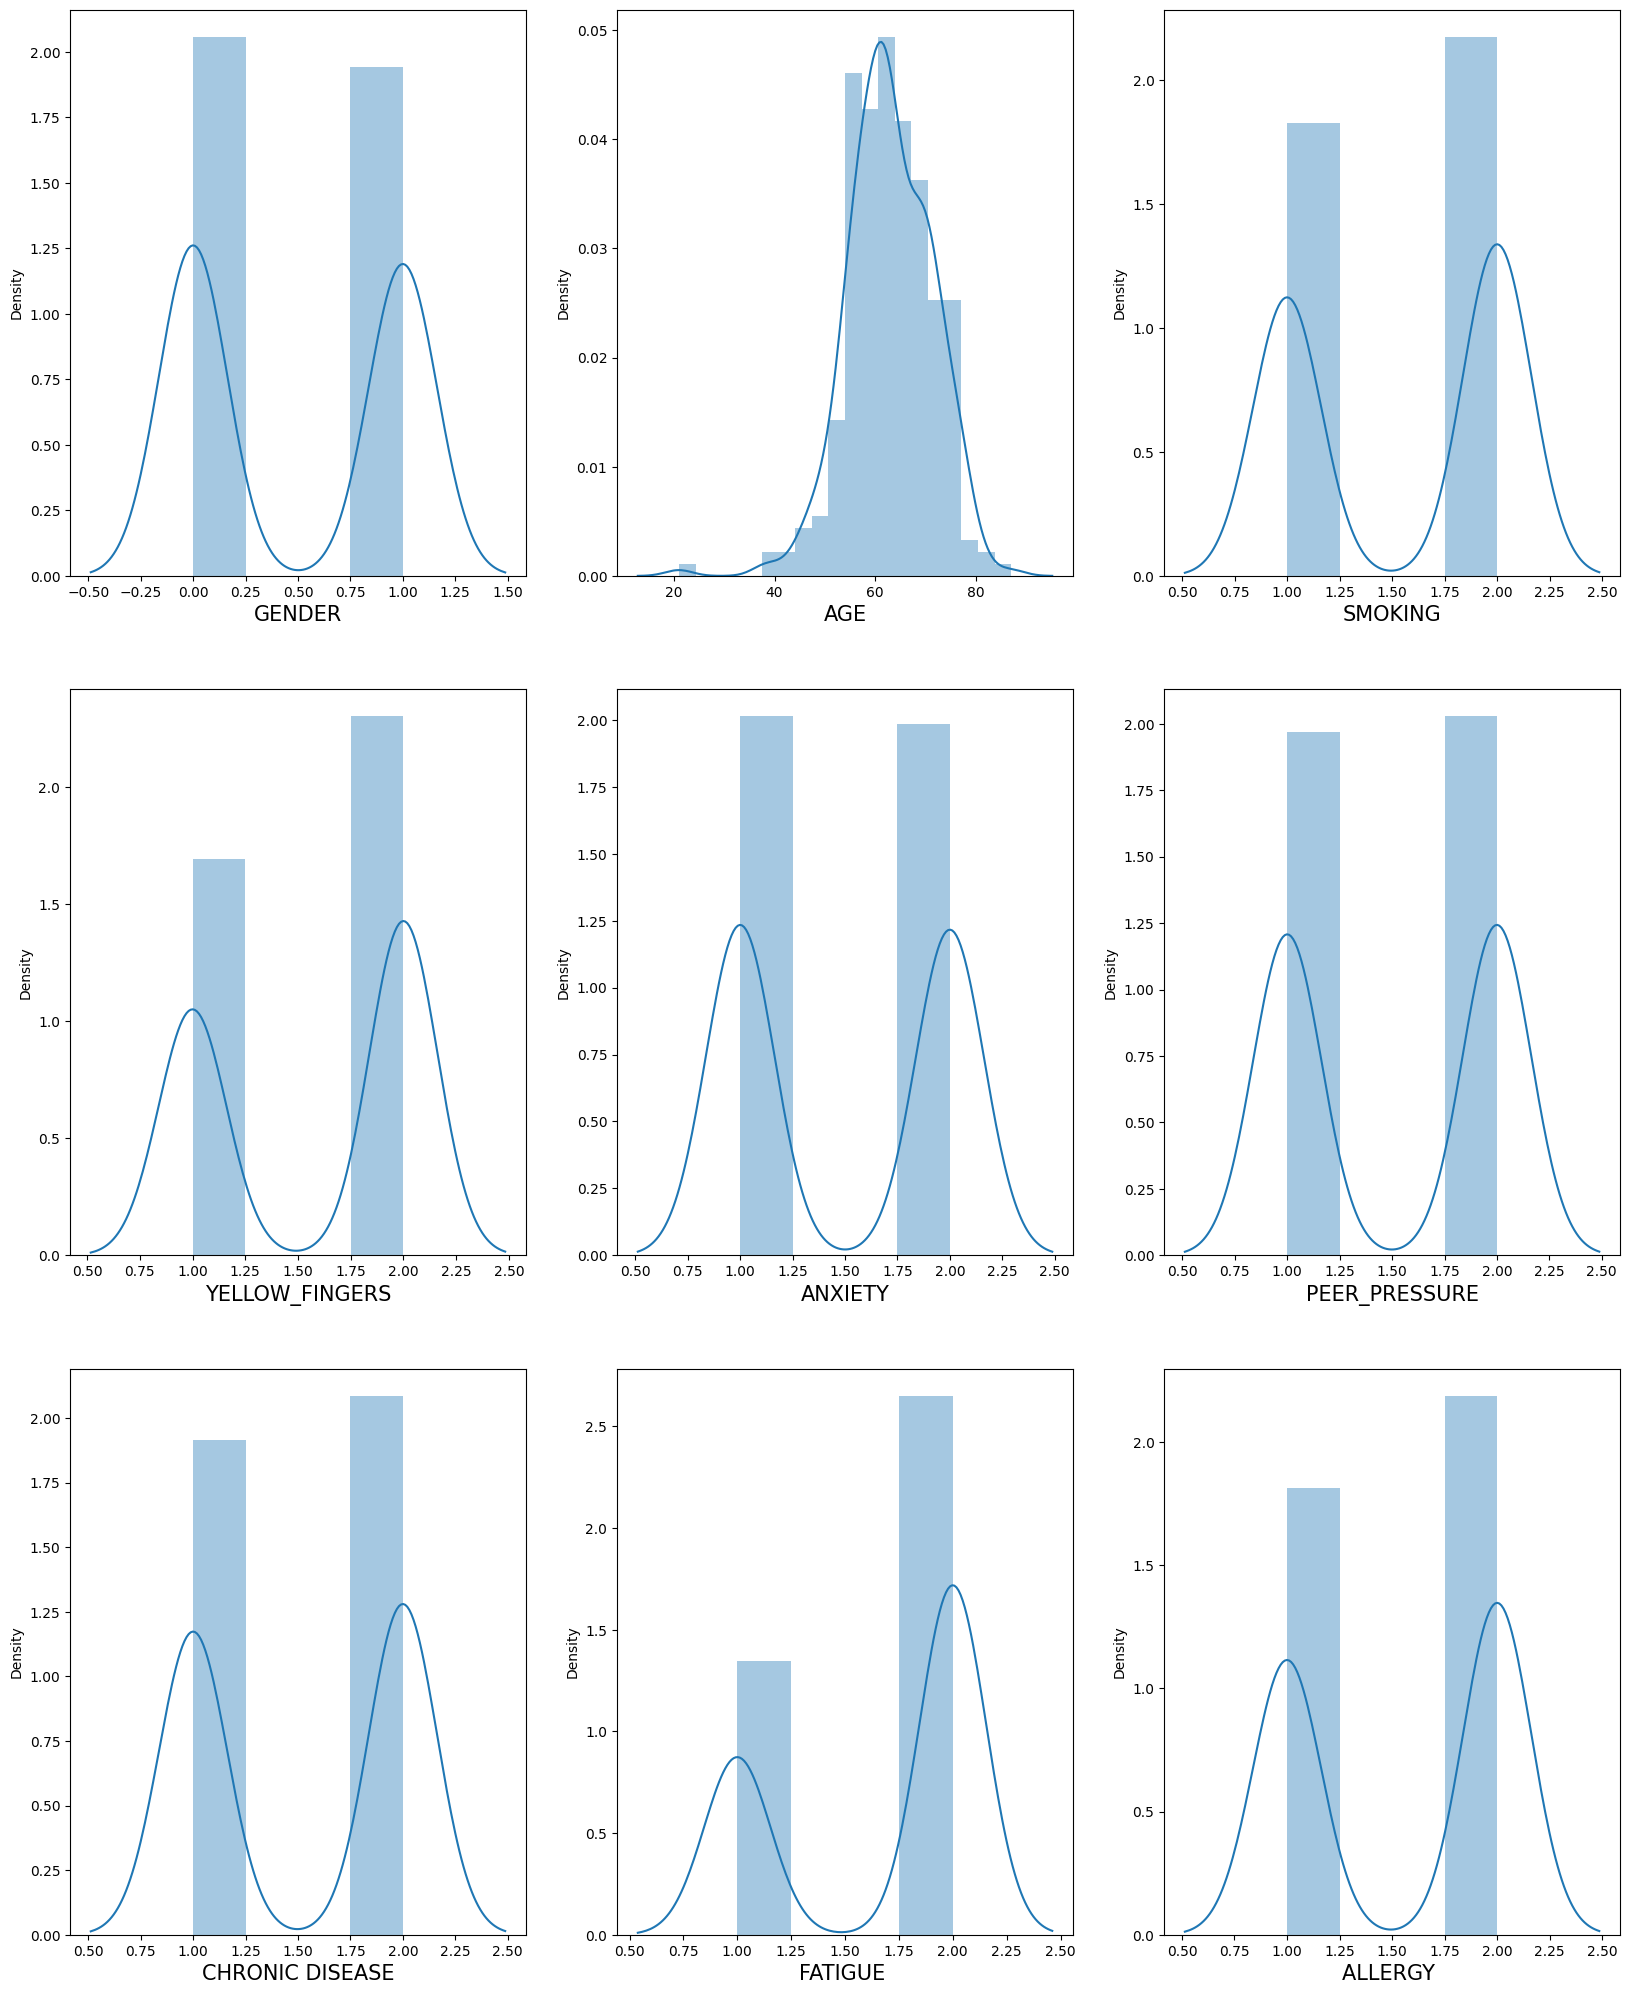

In [137]:
# let's see how data is distributed for every column
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 25))
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

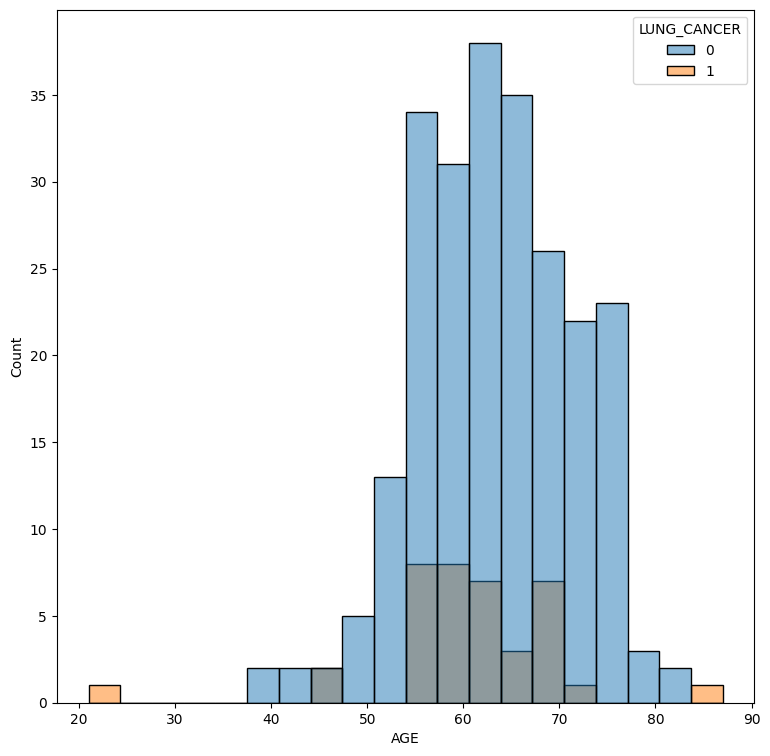

In [138]:
plt.figure(figsize=(9,9))
sns.histplot(data[['AGE', 'LUNG_CANCER']], x = "AGE", hue="LUNG_CANCER")
plt.title("")
plt.show()

**We can see that the distribution of data is normal ! lets move for the Model preparation.** 🚀

### Find Correlations in Data Set

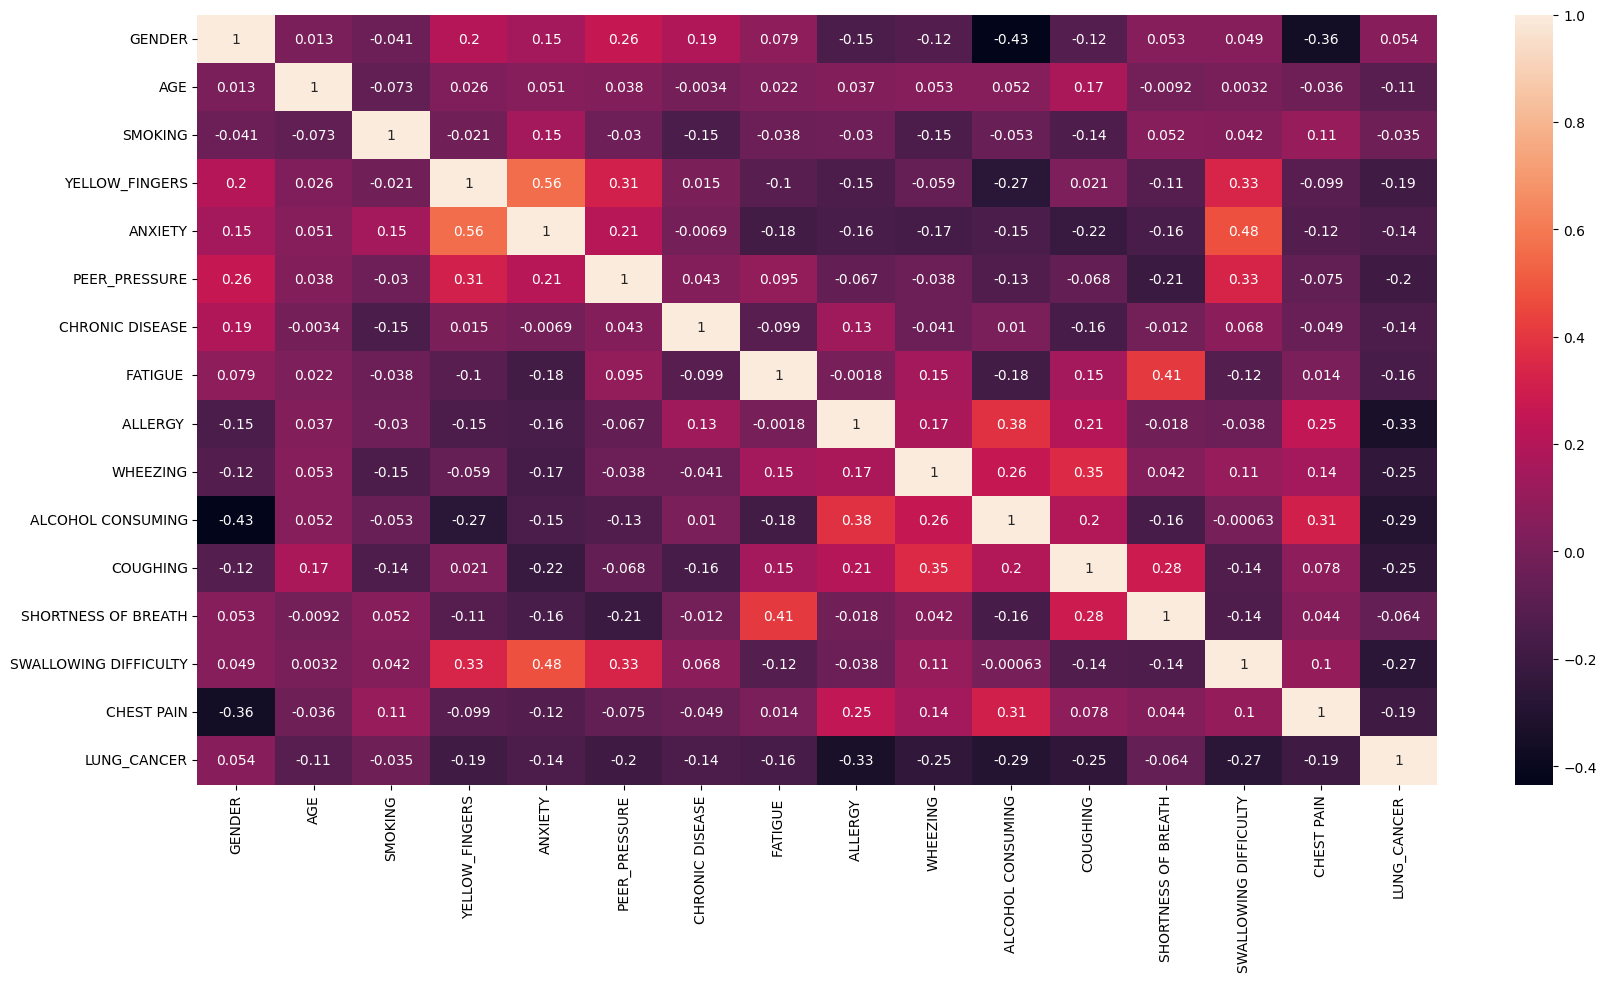

In [139]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True);
plt.show()

# **Model Preparation**

Spilt into X & Y

In [140]:
# separating the data and target
X = data.drop(columns=['LUNG_CANCER'],axis=1)
y = data['LUNG_CANCER']

In [141]:
print("The shape of X is " , X.shape)
print("The shape of Y is " , y.shape)

The shape of X is  (276, 15)
The shape of Y is  (276,)


In [142]:
from sklearn.model_selection import train_test_split
# separating into train and testing
X_train, X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print("Shape of X_train is " ,X_train.shape)
print("Shape of X_test  is " ,X_test.shape)
print("Shape of Y_train is " ,Y_train.shape)
print("Shape of Y_test  is " ,Y_test.shape)

Shape of X_train is  (220, 15)
Shape of X_test  is  (56, 15)
Shape of Y_train is  (220,)
Shape of Y_test  is  (56,)


In [143]:
# After statify Y train & test values
print(Y_train.value_counts())
print(Y_test.value_counts())

0    190
1     30
Name: LUNG_CANCER, dtype: int64
0    48
1     8
Name: LUNG_CANCER, dtype: int64


# **Feature Scalilng**

In [144]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
X_train

array([[ 1.04653624,  0.48957626,  0.94686415, ..., -1.26025208,
        -0.94686415, -1.08545743],
       [-0.95553309,  1.21082701, -1.05611771, ...,  0.79349205,
         1.05611771,  0.92127059],
       [ 1.04653624, -0.23167448,  0.94686415, ...,  0.79349205,
         1.05611771,  0.92127059],
       ...,
       [ 1.04653624,  1.09061855,  0.94686415, ...,  0.79349205,
         1.05611771,  0.92127059],
       [ 1.04653624, -0.71250831, -1.05611771, ..., -1.26025208,
        -0.94686415, -1.08545743],
       [ 1.04653624, -1.19334214, -1.05611771, ...,  0.79349205,
        -0.94686415, -1.08545743]])

In [146]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier(n_estimators=100)
randf.fit(X_train,Y_train)
y_pred=randf.predict(X_test)

In [147]:
randf.feature_importances_

array([0.04811166, 0.21300429, 0.0312289 , 0.05972412, 0.04428904,
       0.06369396, 0.06098418, 0.06748485, 0.08628812, 0.05983788,
       0.0828326 , 0.0494117 , 0.0407027 , 0.04988629, 0.04251971])

In [148]:
features = data.columns.values.tolist()[0:15] #Dropping Dependent Variable Lung Cancer 
feature_pro = pd.Series(randf.feature_importances_,index=features).sort_values(ascending=False)

In [149]:
feature_pro 

AGE                      0.213004
ALLERGY                  0.086288
ALCOHOL CONSUMING        0.082833
FATIGUE                  0.067485
PEER_PRESSURE            0.063694
CHRONIC DISEASE          0.060984
WHEEZING                 0.059838
YELLOW_FINGERS           0.059724
SWALLOWING DIFFICULTY    0.049886
COUGHING                 0.049412
GENDER                   0.048112
ANXIETY                  0.044289
CHEST PAIN               0.042520
SHORTNESS OF BREATH      0.040703
SMOKING                  0.031229
dtype: float64

## Feature Importances Vizualizing

C:\Users\DELL\AppData\Local\Temp\ipykernel_11556\3791828754.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


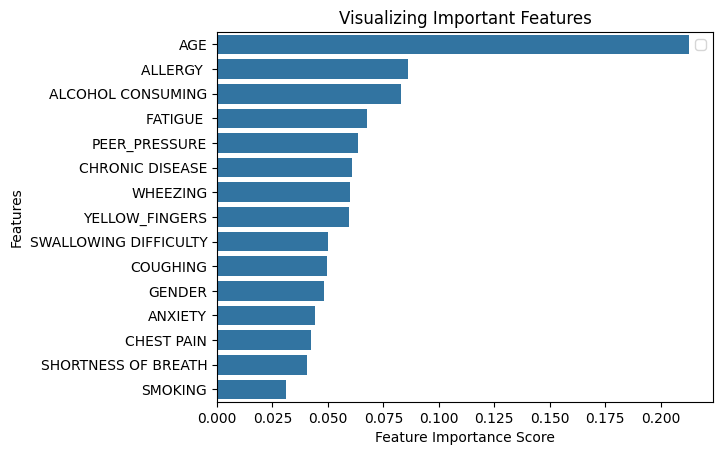

In [150]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_pro, y=feature_pro.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# **Model Training**

**We will train different model after the evaluation of model we will select out best model for production.**

1.   Logistic Regression
2.   KNN
3.   SVC
3.   Decision Tree
4.   Random Forest Regressor
5.   XgBoost
6.   Gradient Boosting


## **Logistic Regression**

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(Y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.9363636363636364
Test Accuracy of Logistic Regression Model is 0.9464285714285714


In [152]:
# confusion matrix 
confusion_matrix(Y_test, y_pred)

array([[48,  0],
       [ 3,  5]], dtype=int64)

In [153]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.62      0.77         8

    accuracy                           0.95        56
   macro avg       0.97      0.81      0.87        56
weighted avg       0.95      0.95      0.94        56



## **SVC**


In [154]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(Y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.9545454545454546
Test Accuracy of SVC Model is 0.9107142857142857


In [155]:
# confusion matrix
confusion_matrix(Y_test, y_pred)

array([[46,  2],
       [ 3,  5]], dtype=int64)

In [156]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        48
           1       0.71      0.62      0.67         8

    accuracy                           0.91        56
   macro avg       0.83      0.79      0.81        56
weighted avg       0.91      0.91      0.91        56



## **DecisionTreeClassifier**

In [157]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 0.9954545454545455
Test Accuracy of Decision Tree Model is 0.8928571428571429


In [158]:
# confusion matrix
confusion_matrix(Y_test, y_pred)

array([[44,  4],
       [ 2,  6]], dtype=int64)

In [159]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.60      0.75      0.67         8

    accuracy                           0.89        56
   macro avg       0.78      0.83      0.80        56
weighted avg       0.91      0.89      0.90        56



## **Hyper parameter tuning**

In [160]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [161]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 9}
0.8863636363636364


In [162]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)
dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.9181818181818182
Test Accuracy of Decesion Tree Model is 0.8928571428571429


**Visualization the DTC tree.**

[Text(0.66875, 0.9166666666666666, 'X[8] <= -0.073\ngini = 0.236\nsamples = 220\nvalue = [190, 30]'),
 Text(0.4375, 0.75, 'X[13] <= 0.055\ngini = 0.38\nsamples = 102\nvalue = [76, 26]'),
 Text(0.225, 0.5833333333333334, 'X[7] <= -0.283\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.1, 0.4166666666666667, 'X[6] <= -0.055\ngini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(0.05, 0.25, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.15, 0.25, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.35, 0.4166666666666667, 'X[3] <= -0.175\ngini = 0.43\nsamples = 32\nvalue = [22, 10]'),
 Text(0.25, 0.25, 'X[10] <= -0.138\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.45, 0.25, 'X[1] <= 0.249\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),

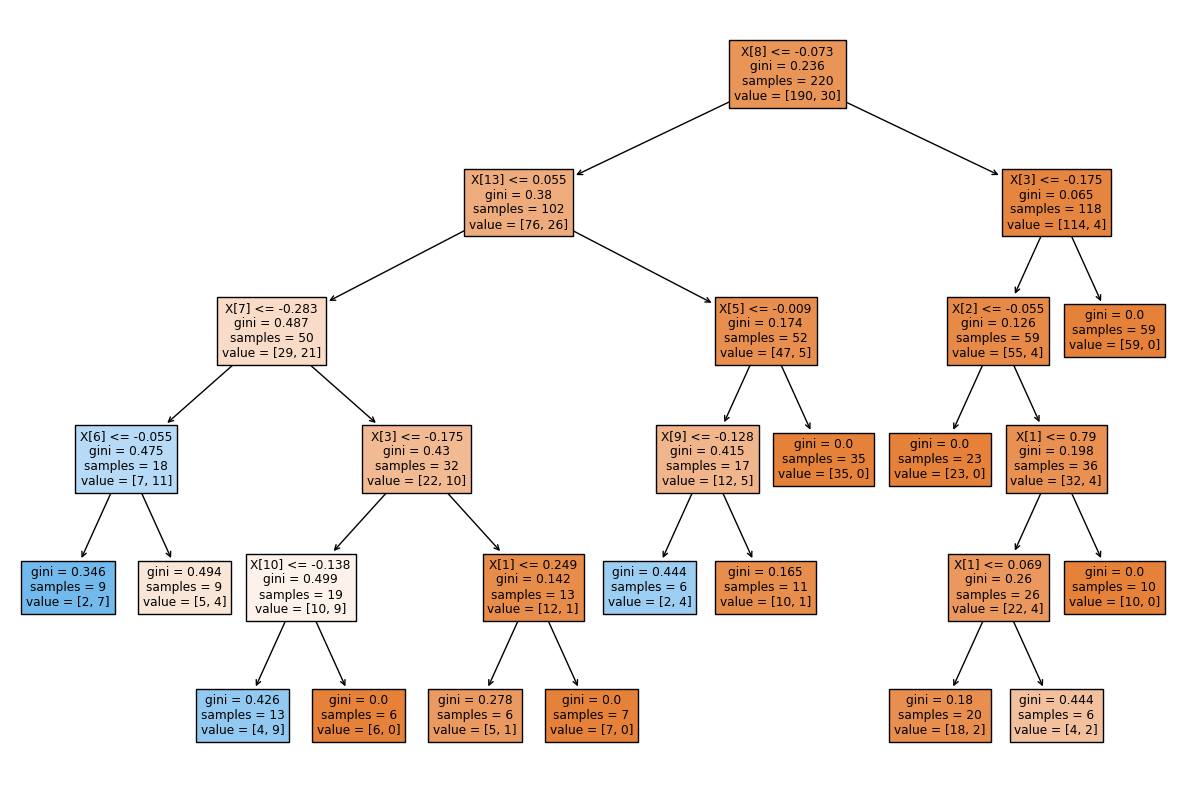

In [163]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

In [164]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

## **Random Forest Classifier**

In [165]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(X_train, Y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.8636363636363636
Test Accuracy of Random Forest Model is 0.8571428571428571


## **GradientBoostingClassifier**

In [166]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [167]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)


{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
0.8818181818181818


In [168]:
gb = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)
gb.fit(X_train, Y_train)

y_pred = gb.predict(X_test)

gb_train_acc = accuracy_score(Y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 0.9954545454545455
Test Accuracy of Gradient Boosting Classifier Model is 0.9107142857142857


In [169]:
# confusion matrix

confusion_matrix(Y_test, y_pred)

array([[47,  1],
       [ 4,  4]], dtype=int64)

In [170]:
# classification report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.80      0.50      0.62         8

    accuracy                           0.91        56
   macro avg       0.86      0.74      0.78        56
weighted avg       0.90      0.91      0.90        56



### ***Logistic Regression gives us the best result so we will save this model for production.***

In [171]:
import pickle
models=LogisticRegression()

In [172]:
# save the model to disk
filename = 'LungCancer_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(models,file)
print(f"Model saved to {filename}")

Model saved to LungCancer_model.pkl


In [173]:
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Test the loaded model (replace X_test with your test data for predictions)
print("Model loaded successfully!")
print(loaded_model)

Model loaded successfully!
LogisticRegression()


## Create Pickle File for Logistic Regression Model

In [174]:
import pickle
# open a file, where you ant to store the data
file = open('Lung_Cancer.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)  #Selecting Logistic Regression as the Model because of Giving highest Accuracy

In [175]:
with open('Lung_Cancer.pkl', 'rb') as file:
    logistic = pickle.load(file)  # Load the model


In [176]:
# Prediction Parameters testing using the imported Model
y_prediction = logistic.predict(X_test)

In [177]:
lr_acc = accuracy_score(Y_test, y_prediction)

In [178]:
lr_acc

0.9464285714285714

**Tesing :**

In [179]:
## Example for Predicting the Lung Cancer
import numpy as np

X_New = [0,45,0,1,1,0,0,0,1,0,0,1,1,0,0] #Non Lung Cancer Patinet 
X_New = np.reshape(X_New, (1, -1))

y_New = logistic.predict(X_New)


#Lung Cancer Patinet 
X_2 = [0,55,0,1,1,1,1,2,1,1,2,1,1,2,2] 
X_2 = np.reshape(X_2, (1, -1))

y_2 = logistic.predict(X_2)

In [180]:
if y_New == 0:
    print("Patinet Has Lung Cancer")
else:
    print("Patinet Doesn't Got Lung Cancer")

Patinet Doesn't Got Lung Cancer


In [181]:
if y_2 == 0:
    print("Patinet Have Lung Cancer")
else:
    print("Patinet Doesn't Got Lung Cancer")

Patinet Have Lung Cancer
